In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Wind_data.csv')
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values
y = y.reshape(len(y),1)

In [3]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X)
# X = imputer.transform(X)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
y_predict = lin_reg.predict(X_test)
y_predict = sc_y.inverse_transform(y_predict).reshape(len(y_predict),1)

In [8]:
for i in range(len(y_predict)):
    if y_predict[i] < 0 : y_predict[i] = 0

In [9]:
# evaluate predictions
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 0.050


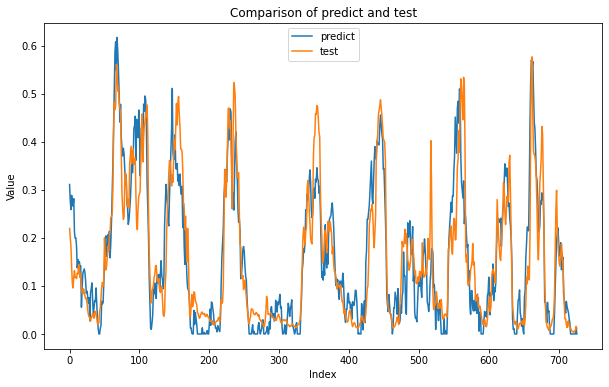

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_predict, label='predict')
plt.plot(y_test, label='test')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of predict and test')
plt.legend()

# Show the plot
plt.show()